In [12]:
#Initializing the data into dataframes and importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
#% matplotlib inline

cn_df = pd.read_csv('U.S. Census Data.csv')
gd_df = pd.read_excel('gun_data.xlsx',engine='openpyxl')

<AxesSubplot:xlabel='month'>

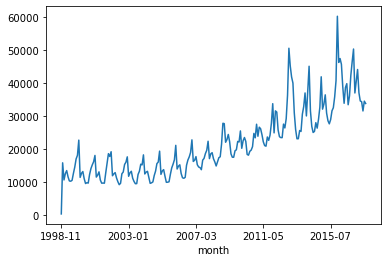

In [13]:
#Looking at gun totals by month
gd_df.groupby('month',as_index='False').mean()['totals'].plot()

That's interesting, there seems to be a consistent trend of gun buying within each year.

In [14]:
#Adding columns for split year and split month and renaming month to be year-month 
new_col = list(gd_df['month'])
year = []
month = []
for i in new_col:
    year.append(i[0:4])
    month.append(i[5:])
gd_df['year-month'] = gd_df['month']
gd_df['month'] = month
gd_df['year'] = year

In [15]:
#Reordering columns
cols = gd_df.columns.to_list()
cols = cols[-2:] + cols[:-2]
gd_df = gd_df[cols]

<AxesSubplot:xlabel='month'>

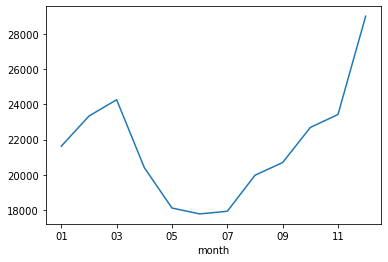

In [16]:
gd_df.groupby('month').mean()['totals'].plot()

We know from the graph above that in general guns are purchased near the winter time and fewer are bought in the summer.

<AxesSubplot:xlabel='year'>

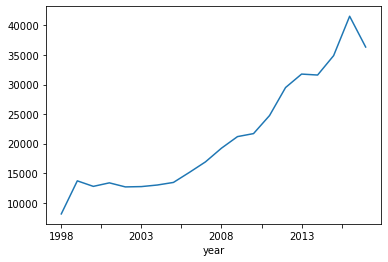

In [17]:
gd_df.groupby('year').mean()['totals'].plot()

And we know from the above graph that gun sales have been steadily climbing for the past several years, with a recent decrease starting when?

<BarContainer object of 55 artists>

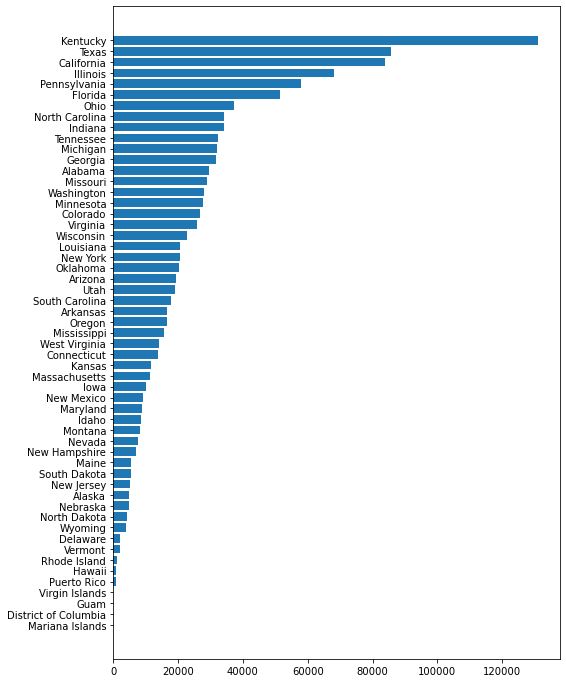

In [18]:
totals = gd_df.groupby('state').mean()['totals'].sort_values(ascending=True)
plt.figure(figsize=(8,12))
plt.barh(totals.index,totals)

We can see that residents of Kentucky, Texas, California, Illinois, and Pennsylvania are among the top gun buyers throughout this time period.

<BarContainer object of 55 artists>

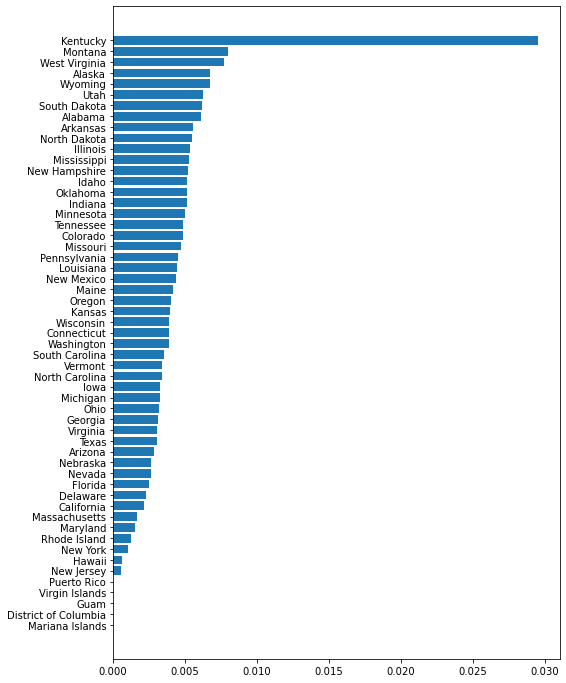

In [19]:
state_list = list(gd_df['state'].unique())
pop_dict = {}
for i in state_list:
    try:
        pop_dict.update({i:float(cn_df[i][0].replace(',',''))})
        #pop_list.append(test)
    except:
        #print(i,'KeyError')
        pop_dict.update({i:10000000000.0})
avg_gun_dict = dict(totals)
list_1 = []
list_2 = []
for i in avg_gun_dict:
    list_1.append(i)
    list_2.append((avg_gun_dict[i]/pop_dict[i]))
per_capita_df = pd.DataFrame(list_2,index=list_1,columns=['Values'])
pc = per_capita_df['Values'].sort_values(ascending=True)
plt.figure(figsize=(8,12))
plt.barh(pc.index,pc)

Shown above is the Average Annual Gun Sales Per Capita, as we can see, it shows a slightly different picture than what we saw above, with Kentucky leading the national average by a significant margin, but the states immediately following are quite different.

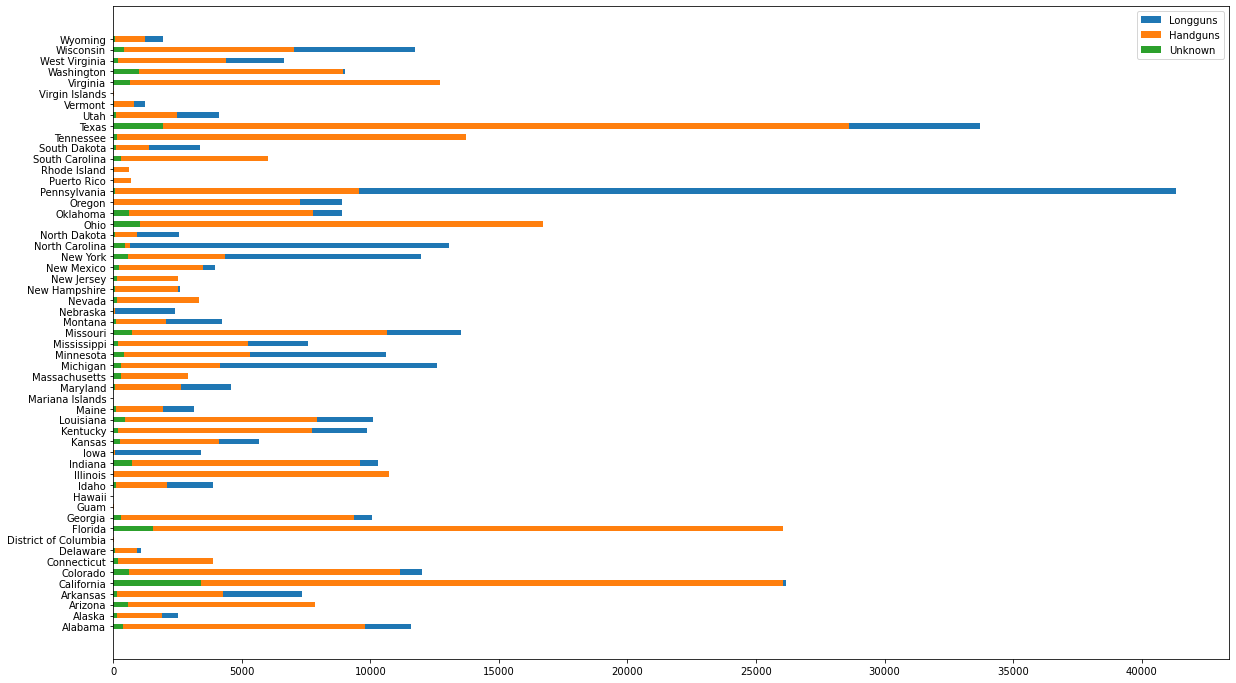

In [75]:
hand_guns = gd_df.groupby('state').mean()['handgun']
long_guns = gd_df.groupby('state').mean()['long_gun']
unknown = gd_df.groupby('state').mean()['other']

width = .5  # the width of the bars
plt.figure(figsize=(20,12))
plt.barh(long_guns.index,long_guns, width, label='Longguns')
plt.barh(hand_guns.index,hand_guns, width, label='Handguns')
plt.barh(unknown.index, unknown, width, label='Unknown')
plt.legend()


And the graph above, split by type of gun shows a different picture than the graphs above. Looking at long gun sales, the state of Pennsylvania is leading the charge!